In [219]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  

In [220]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [221]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [222]:
stop = set(stopwords.words('english'))
for w in ['wa','ha','us','place','translated','great','people','church','aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']:
    STOPWORDS.add(w)

In [223]:
def read_reviews(folder,fname):
    test=pd.read_csv(folder + fname )
    return test['review'].str.cat(sep=' ').replace('\n', ' ')

In [224]:
def lemmatize(string,on_off):
    if on_off == 0:
        return string
    if on_off == 1:
        lemmatizer = WordNetLemmatizer()
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(string)])
        return lemmatized_output

In [225]:
def read_all(denom,lem):
    df = pd.DataFrame(columns =['church','reviews','denomination'])
 
    for key, value in denom.items():
        mypath='C:/Users/aben_/Documents/ISYE 6740/Homework/project/' + key + '/'
        files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
        for file in files:
            review_text = lemmatize(read_reviews(mypath,file),lem)
            row_to_append = pd.DataFrame([{'church':file.split('.')[0], 'reviews':review_text,"denomination": value}])
            df = pd.concat([df,row_to_append])
    return df

In [226]:
def get_bow(df):
    #word cloud by word count (DTM)
    cv=CountVectorizer(stop_words=STOPWORDS, ngram_range=(1, 1))
    bag_of_words = cv.fit_transform(all_text['reviews'])
    bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = cv.get_feature_names_out ())
    return bag_of_words

In [227]:
denominations = {'pcusa': 0, 'pca': 1, 'opc': 2}

In [228]:
all_text=read_all(denominations,0)
all_text

,church,reviews,denomination
0,pcusa0,I went to this church to the food bank a great...,0
0,pcusa1,Everything a faith family should be - upliftin...,0
0,pcusa10,The congregation is very welcoming. The pastor...,0
0,pcusa11,Absolutely beautiful Church ❤️ built in the 18...,0
0,pcusa12,Amazing. The youth group is very nice and ever...,0
...,...,...,...
0,opc95,This has been my home church for most of my li...,2
0,opc96,Many Christian Churches today do not preach th...,2
0,opc97,"Great place to worship. Warm, traditional atm...",2
0,opc98,Good people Had a short stay but the people se...,2


In [245]:
bow=get_bow(all_text)
bow

,00,0000,00am,00pm,10,100,1000,1030,10a,10am,...,말씀이,사랑으로,사랑하고,살리는교회,살아서,서로,애쓰는교회입니다,주님에,특별히,항상깨어서
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer


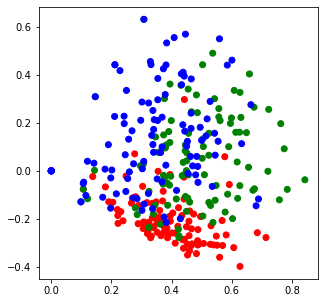

In [247]:
#v = TfidfVectorizer(max_features=35,ngram_range=(1,2),use_idf=True,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
v = TfidfVectorizer(max_features=50,ngram_range=(1,1),use_idf=False,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
x = v.fit_transform(all_text['reviews'])
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
principalComponents = svd.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf_concat = pd.concat([all_text.reset_index(),principalDf.reset_index()], axis=1)
colors = {0:'red', 1:'green', 2:'blue'}


fig = plt.figure()
ax = fig.add_subplot(111)

x = principalDf_concat.iloc[:,5]
y = principalDf_concat.iloc[:,6]

ax.scatter(x, y,c = principalDf_concat['denomination'].map(colors))
plt.show()


In [248]:
feature_names = v.get_feature_names_out()
best_features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
best_features

['word',
 'teaching',
 'bible',
 'one',
 'will',
 'gospel',
 'fellowship',
 'really',
 'visit',
 'come',
 'always',
 'amazing',
 'jesus',
 'loving',
 'children',
 'presbyterian',
 'biblical',
 'time',
 'welcome',
 'members',
 'excellent',
 'kind',
 'well',
 'life',
 'music',
 'go',
 'everyone',
 'many',
 'best',
 'thank',
 'lord',
 'services',
 'new',
 'first',
 'looking',
 'sermons',
 'staff',
 'school',
 'awesome',
 'feel',
 'every',
 'small',
 'sound',
 'group',
 'faith',
 'much',
 'experience',
 'even',
 'help',
 'thanks']

In [249]:
X_tfidf = v.fit_transform(all_text['reviews']).toarray()
vocab = v.vocabulary_
reverse_vocab = {v:k for k,v in vocab.items()}

feature_names = v.get_feature_names()
df_tfidf = pd.DataFrame(X_tfidf, columns = feature_names)

idx = X_tfidf.argsort(axis=1)

tfidf_max10 = idx[:,-10:]

df_tfidf['top10'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max10 ]

df_tfidf['top10'] 

C:\Users\aben_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0      [really, music, first, best, sermons, word, je...
1      [amazing, experience, staff, children, kind, a...
2      [help, faith, really, one, everyone, every, co...
3      [gospel, group, help, jesus, experience, feel,...
4      [feel, loving, go, everyone, thanks, visit, we...
                             ...                        
304    [word, members, sermons, jesus, experience, bi...
305    [always, loving, life, kind, experience, many,...
306    [go, group, help, jesus, kind, experience, wor...
307    [first, go, gospel, group, help, jesus, experi...
308    [help, excellent, fellowship, come, teaching, ...
Name: top10, Length: 309, dtype: object

In [250]:
global_top10_idx = X_tfidf.max(axis=0).argsort()[-10:]
np.asarray(feature_names)[global_top10_idx]

array(['every', 'sermons', 'lord', 'excellent', 'biblical', 'will',
       'bible', 'visit', 'awesome', 'group'], dtype='<U12')

### KNN

In [251]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from pylab import rcParams
from sklearn.metrics import accuracy_score, classification_report

data = principalDf_concat.iloc[:,[5,6]]
labels = principalDf_concat.iloc[:,[3]]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data,labels, test_size=0.2, random_state=1 )
data2=data.to_numpy()
y2=labels.to_numpy()

In [252]:
def accuracy(k, X_train, y_train, X_test, y_test):
    '''
    compute accuracy of the classification based on k values 
    '''
    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)

    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)

C:\Users\aben_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aben_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


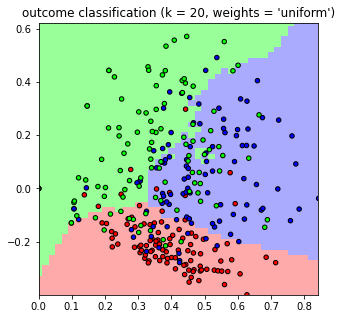

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.68      0.71      0.70        21
           1       0.58      0.61      0.59        18
           2       0.71      0.65      0.68        23

    accuracy                           0.66        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.66      0.66      0.66        62

----------------------------------------------------------------------
----------------------------------------------------------------------


C:\Users\aben_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\aben_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


TypeError: 'float' object is not callable

In [276]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF','#99FF99'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF','#00FF00'])
n_neighbors=20

rcParams['figure.figsize'] = 5, 5
h           = .02

for weights in ['uniform','distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(x_train.to_numpy(), y_train.to_numpy().astype(np.int64))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = data2[:, 0].min() , data2[:, 0].max() 
    y_min, y_max = data2[:, 1].min() , data2[:, 1].max() 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
    plt.scatter(data2[:, 0], data2[:, 1], c=y2, cmap=cmap_bold, edgecolor='k', s=20)   
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()
    fig.savefig(weights +'.png')
    
    # evaluate
    y_expected  = y_test.to_numpy().astype(np.int64)
    y_predicted = clf.predict(x_test)
    
    # print results
    print('----------------------------------------------------------------------')
    print('Classification report')
    print('----------------------------------------------------------------------')
    print('\n', classification_report(y_expected, y_predicted))
    print('----------------------------------------------------------------------')  
    print('----------------------------------------------------------------------')
    print('Accuracy = %5s' % round(accuracy(n_neighbors, x_train, y_train.to_numpy().astype(np.int64), x_test, y_test.to_numpy().astype(np.int64)), 3))
    print('----------------------------------------------------------------------')
    

### KMeans

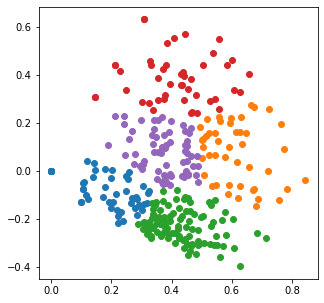

----------------------------------------------------------------------
Accuracy = 64.078
----------------------------------------------------------------------


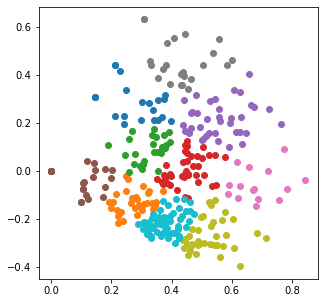

----------------------------------------------------------------------
Accuracy = 68.608
----------------------------------------------------------------------


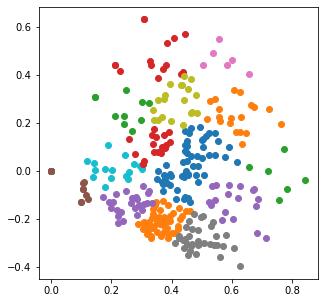

----------------------------------------------------------------------
Accuracy = 68.932
----------------------------------------------------------------------


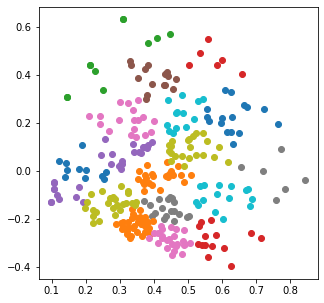

----------------------------------------------------------------------
Accuracy = 69.256
----------------------------------------------------------------------


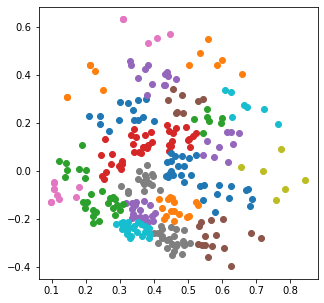

----------------------------------------------------------------------
Accuracy = 69.903
----------------------------------------------------------------------


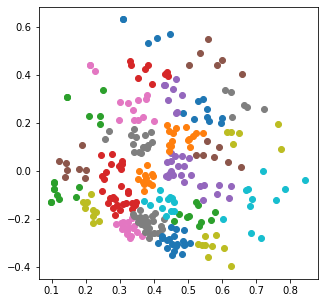

----------------------------------------------------------------------
Accuracy = 68.608
----------------------------------------------------------------------


In [273]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans

for i in range(5,35,5):
    df_means=principalDf_concat.iloc[:,[5,6]]
    #Initialize the class object
    kmeans = KMeans(n_clusters= i)
     
    #predict the labels of clusters.
    label = kmeans.fit_predict(df_means)
    combined=pd.concat([df_means,pd.DataFrame(kmeans.labels_, columns =['label']),principalDf_concat.iloc[:,[3]]], axis=1)  
    
    #Getting unique labels
    u_labels = np.unique(label)
     
    #plotting the results:
    for i in u_labels:
        plt.scatter(combined[combined['label']==i].iloc[:,0], combined[combined['label']==i].iloc[:,1] , label = i)
    #plt.legend()
    plt.show()

    total= df_means.shape[0]
    total_correct = 0
    
    for i in u_labels:
        label_group=combined[combined['label']==i]
        implied_category= label_group.iloc[:,3].mode()[0]
        total_correct= total_correct + label_group[label_group['denomination']==implied_category].shape[0]
        
    accuracy= total_correct/total
    print('----------------------------------------------------------------------')
    print('Accuracy = %5s' % round(100*accuracy, 3))
    print('----------------------------------------------------------------------')
 
        

## SVM

In [255]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [285]:
def run_svm(kernel,max_pc):
    for pc in range(2,max_pc):
        
        v_SVM = TfidfVectorizer(max_features=50,ngram_range=(1,1),use_idf=False,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
        x_SVM = v_SVM.fit_transform(all_text['reviews'])
        svd_SVM = TruncatedSVD(n_components=pc, n_iter=7, random_state=42)
        principalComponents_SVM = svd_SVM.fit_transform(x_SVM)
    
        principalDf_SVM = pd.DataFrame(data = principalComponents_SVM)
        principalDf_concat = pd.concat([all_text.reset_index(),principalDf_SVM.reset_index()], axis=1)
        
        data = principalDf_concat.iloc[:,[5,5+pc-1]]
        labels = principalDf_concat.iloc[:,[3]]
        
        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=109) # 70% training and 30% test
        
        #Create a svm Classifier
        clf = svm.SVC(kernel=kernel,gamma=.1)
        clf.fit(X_train.to_numpy(), y_train.to_numpy().astype(np.int64))
        y_pred = clf.predict(X_test.to_numpy())
        print("Kernel: ",kernel)
        print("Principal Components: ",pc)
        print("Num Support Vectors: ",clf.n_support_)
        #print("Accuracy:",metrics.accuracy_score(y_test.to_numpy().astype(np.int64), y_pred))
        
        print('Accuracy = %5s' % round(100*metrics.accuracy_score(y_test.to_numpy().astype(np.int64), y_pred), 3))
        def plot_contours(ax, clf, xx, yy, **params):
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
            return out
        
        
        fig, ax = plt.subplots()
        # title for the plots
        title = ('Decision surface of linear SVC ')
        # Set-up grid for plotting.

        plt.xlim(0, .84)
        plt.ylim(-0.39, 0.62)
        plot_contours(ax, clf, xx, yy, cmap=cmap_light, alpha=0.8)
        plt.scatter(data2[:, 0], data2[:, 1], c=y2, cmap=cmap_bold, edgecolor='k', s=20)   
        #ax.scatter(X0, X1, c=y_train.to_numpy().astype(np.int64), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_ylabel('Principal Component 2')
        ax.set_xlabel('Principal Component 1')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        ax.legend()
        plt.show()

C:\Users\aben_\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Kernel:  linear
Principal Components:  2
Num Support Vectors:  [55 71 68]
Accuracy = 74.194


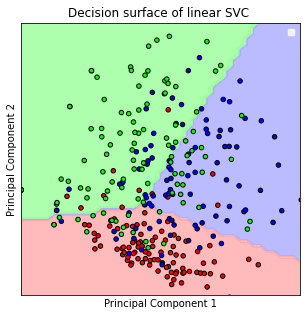

In [286]:
run_svm('linear',3)

In [264]:
yy

array([[-0.39913472, -0.39913472, -0.39913472, ..., -0.39913472,
        -0.39913472, -0.39913472],
       [-0.37913472, -0.37913472, -0.37913472, ..., -0.37913472,
        -0.37913472, -0.37913472],
       [-0.35913472, -0.35913472, -0.35913472, ..., -0.35913472,
        -0.35913472, -0.35913472],
       ...,
       [ 0.58086528,  0.58086528,  0.58086528, ...,  0.58086528,
         0.58086528,  0.58086528],
       [ 0.60086528,  0.60086528,  0.60086528, ...,  0.60086528,
         0.60086528,  0.60086528],
       [ 0.62086528,  0.62086528,  0.62086528, ...,  0.62086528,
         0.62086528,  0.62086528]])

C:\Users\aben_\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Kernel:  rbf
Principal Components:  2
Accuracy = 73.118


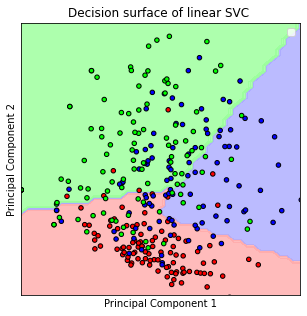

In [274]:
run_svm('rbf',3)

### NAIVE Bayes

In [25]:
from sklearn.datasets import load_files
from sklearn import feature_extraction
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

v_nb = TfidfVectorizer(max_features=50,ngram_range=(1,1),use_idf=False,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
x_nb = v.fit_transform(all_text['reviews'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_nb,labels, test_size=0.3, random_state=1 )

clf = MultinomialNB()
clf.fit(x_train, y_train.to_numpy().astype(np.int64))
pred_y = clf.predict(x_test)

print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(y_test.to_numpy().astype(np.int64), pred_y)))

Accuracy: 73.61 %


C:\Users\aben_\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

### NB no IDF



In [27]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(bow).toarray()

In [28]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:


# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, labels)

In [64]:
# Naive Bayes 
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(X_train, y_train.to_numpy().astype(np.int64))

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.to_numpy().astype(np.int64), y_pred)
print('Accuracy: %2.2f %%' % (100. *  accuracy))

Accuracy: 70.83 %


C:\Users\aben_\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
count_vect = CountVectorizer() 

neg_class_prob_sorted = classifier.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = classifier.feature_log_prob_[1, :].argsort()[::-1]

In [97]:
bow.columns[list(classifier.feature_log_prob_[0, :].argsort()[::-1][:20])]

Index(['friendly', 'beautiful', 'wonderful', 'community', 'love', 'welcoming',
       'service', 'nice', 'pastor', 'good', 'family', 'congregation',
       'worship', 'god', 'always', 'presbyterian', 'warm', 'home', 'sunday',
       'go'],
      dtype='object')

In [98]:
bow.columns[list(classifier.feature_log_prob_[1, :].argsort()[::-1][:20])]

Index(['friendly', 'love', 'god', 'worship', 'pastor', 'family', 'preaching',
       'teaching', 'welcoming', 'congregation', 'wonderful', 'nice',
       'community', 'word', 'christ', 'home', 'gospel', 'service', 'good',
       'sunday'],
      dtype='object')

In [99]:
bow.columns[list(classifier.feature_log_prob_[2, :].argsort()[::-1][:20])]

Index(['god', 'preaching', 'worship', 'friendly', 'word', 'congregation',
       'love', 'christ', 'good', 'pastor', 'welcoming', 'bible', 'biblical',
       'fellowship', 'wonderful', 'teaching', 'reformed', 'service', 'gospel',
       'warm'],
      dtype='object')

In [101]:
print('Most Predictive Words for PC(USA): \n {}'.format([i for i in bow.columns[list(classifier.feature_log_prob_[0, :].argsort()[::-1][:20])]]))
print('\n')
print('Most Predictive Words for PCA): \n {}'.format([i for i in bow.columns[list(classifier.feature_log_prob_[1, :].argsort()[::-1][:20])]]))
print('\n')
print('Most Predictive Words for OPC: \n {}'.format([i for i in bow.columns[list(classifier.feature_log_prob_[2, :].argsort()[::-1][:20])]]))


Most Predictive Words for PC(USA): 
 ['friendly', 'beautiful', 'wonderful', 'community', 'love', 'welcoming', 'service', 'nice', 'pastor', 'good', 'family', 'congregation', 'worship', 'god', 'always', 'presbyterian', 'warm', 'home', 'sunday', 'go']


Most Predictive Words for PCA): 
 ['friendly', 'love', 'god', 'worship', 'pastor', 'family', 'preaching', 'teaching', 'welcoming', 'congregation', 'wonderful', 'nice', 'community', 'word', 'christ', 'home', 'gospel', 'service', 'good', 'sunday']


Most Predictive Words for OPC: 
 ['god', 'preaching', 'worship', 'friendly', 'word', 'congregation', 'love', 'christ', 'good', 'pastor', 'welcoming', 'bible', 'biblical', 'fellowship', 'wonderful', 'teaching', 'reformed', 'service', 'gospel', 'warm']


### Decision Tree

In [102]:
import csv
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import scipy.io as spio
from numpy import linalg as LA
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
from numpy.random import normal
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import random
from sklearn import tree
random.seed(1215)
np.random.seed(1215)
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier

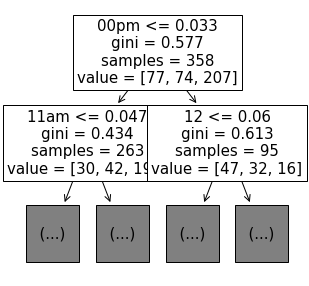

<Figure size 90432x90432 with 0 Axes>

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x_nb, labels)

cart=DecisionTreeClassifier().fit(X_train,y_train.to_numpy().astype('int'))

tree.plot_tree(cart,max_depth=1,fontsize=15,feature_names= bow.columns.values.tolist())
plt.figure(figsize=(1256,1256))

plt.show()

In [104]:
1-cart.score(X_test,y_test.astype('int'))


0.3666666666666667

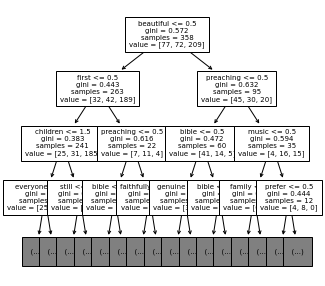

<Figure size 90432x90432 with 0 Axes>

Accuracy: 66.67 %


In [127]:
X_train, X_test, y_train, y_test = train_test_split(bow, labels)

cart=DecisionTreeClassifier().fit(X_train,y_train.to_numpy().astype('int'))

tree.plot_tree(cart,max_depth=3,fontsize=7,feature_names= bow.columns.values.tolist())
plt.figure(figsize=(1256,1256))

plt.show()
print('Accuracy: %2.2f %%' % (100. *  cart.score(X_test,y_test.astype('int'))))


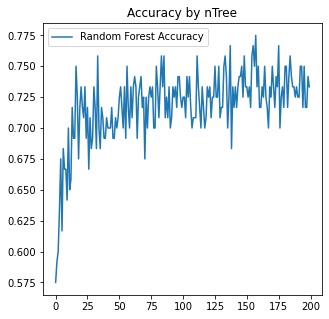

Accuracy: 73.33 %


In [131]:
X_train, X_test, y_train, y_test = train_test_split(x_nb, labels)

RF_plot=np.ones(200)
for i in range(201):
    RF2=RandomForestClassifier(n_estimators=i+1).fit(X_train,y_train.to_numpy().astype('int').ravel())
    RF_plot[i-1]=RF2.score(X_test,y_test.astype('int'))
    
plt.title("Accuracy by nTree")
plt.plot(RF_plot, label='Random Forest Accuracy')
plt.legend()
plt.show()
print('Accuracy: %2.2f %%' % (100. *  RF2.score(X_test,y_test.astype('int'))))


0.75

In [277]:
principalDf_concat

,index,church,reviews,denomination,index,principal component 1,principal component 2
0,0,pcusa0,I went to this church to the food bank a great...,0,0,0.403886,-0.175951
1,0,pcusa1,Everything a faith family should be - upliftin...,0,1,0.319733,-0.262061
2,0,pcusa10,The congregation is very welcoming. The pastor...,0,2,0.457705,-0.210575
3,0,pcusa11,Absolutely beautiful Church ❤️ built in the 18...,0,3,0.303962,-0.218152
4,0,pcusa12,Amazing. The youth group is very nice and ever...,0,4,0.443225,-0.285604
...,...,...,...,...,...,...,...
304,0,opc95,This has been my home church for most of my li...,2,304,0.600725,0.462159
305,0,opc96,Many Christian Churches today do not preach th...,2,305,0.470046,0.020725
306,0,opc97,"Great place to worship. Warm, traditional atm...",2,306,0.331652,0.443537
307,0,opc98,Good people Had a short stay but the people se...,2,307,0.307968,0.632400


In [279]:
principalDf_concat[principalDf_concat['principal component 2']<-.2].to_csv('inspection.csv')

In [281]:
principalDf_concat.to_csv('inspection3.csv')